# House Damage in Nepal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### Data description and Problem statement

### Data Prep

In [2]:
# read in data
train_data = pd.read_csv("train_values.csv", index_col="building_id")
train_label = pd.read_csv("train_labels.csv", index_col="building_id")
test_data = pd.read_csv("test_values.csv")

In [3]:
print(f"Training set has {train_data.shape[0]} rows and {train_data.shape[1]} column")
print(f"Test set has {test_data.shape[0]} rows and {test_data.shape[1]} column")
print(f"Train label has {train_label.shape[0]} rows and {train_label.shape[1]} column")

Training set has 260601 rows and 38 column
Test set has 86868 rows and 39 column
Train label has 260601 rows and 1 column


In [4]:
train_data.head()
#train_label.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

In [6]:
train_label.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


In [7]:
df = pd.merge(train_data,train_label, on="building_id", how="inner")

In [8]:
train_data.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### `INSIGHT`

In [9]:
train_data.roof_type.nunique()

3

### EDA on Categorical Columns

#### *Cardinality*

In [10]:
train_data.select_dtypes("object").nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
legal_ownership_status     4
dtype: int64

In [11]:
train_data.roof_type.value_counts()

roof_type
n    182842
q     61576
x     16183
Name: count, dtype: int64

Text(0, 0.5, 'Percentage')

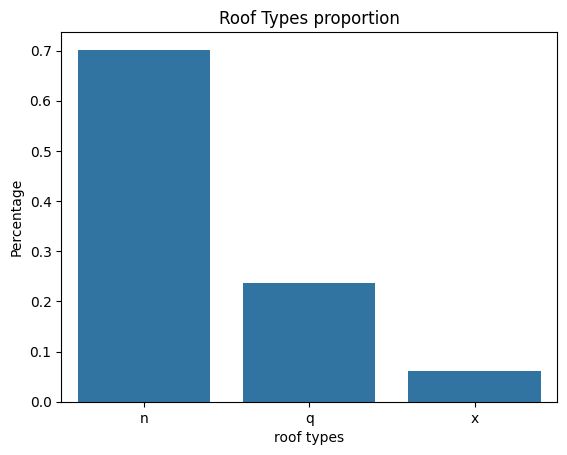

In [12]:
sns.barplot(data=train_data.roof_type.value_counts(normalize=True))
plt.title("Roof Types proportion")
plt.xlabel("roof types")
plt.ylabel("Percentage")

In [13]:
train_data.land_surface_condition.value_counts(normalize=True)

land_surface_condition
t    0.831758
n    0.136331
o    0.031911
Name: proportion, dtype: float64

<Axes: xlabel='land_surface_condition', ylabel='proportion'>

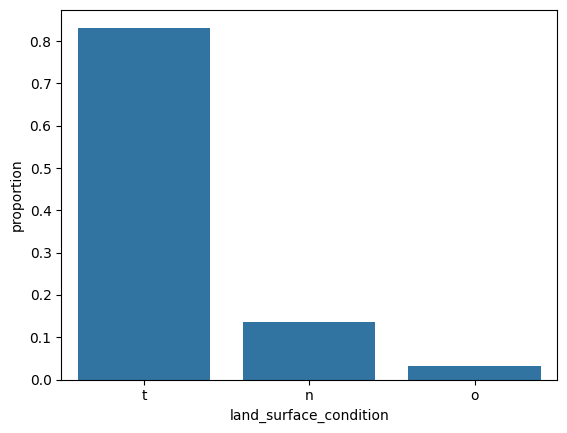

In [14]:
sns.barplot(data=train_data.land_surface_condition.value_counts(normalize=True))

In [15]:
(df.groupby(['damage_grade', 'roof_type'])['roof_type'].count()).to_frame()

roof_type
damage_grade roof_type           
1            n              13547
             q               3926
             x               7651
2            n             106447
             q              34009
             x               7803
3            n              62848
             q              23641
             x                729

In [16]:
# Foundtion type
train_data.foundation_type.value_counts()

foundation_type
r    219196
w     15118
u     14260
i     10579
h      1448
Name: count, dtype: int64

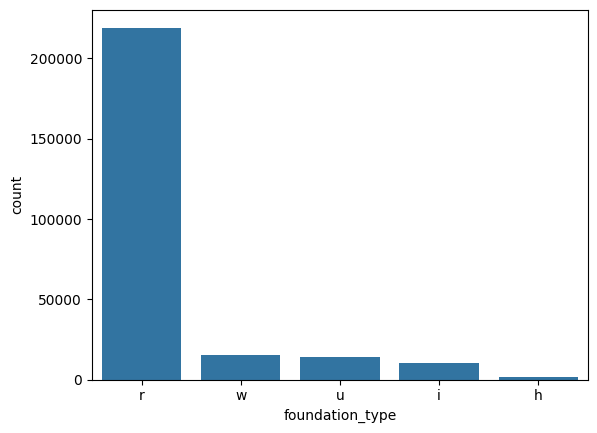

In [17]:
#plot distribution
sns.barplot(data=train_data.foundation_type.value_counts());

In [18]:
# Ground floor types
train_data.ground_floor_type.value_counts()

ground_floor_type
f    209619
x     24877
v     24593
z      1004
m       508
Name: count, dtype: int64

<Axes: xlabel='ground_floor_type', ylabel='count'>

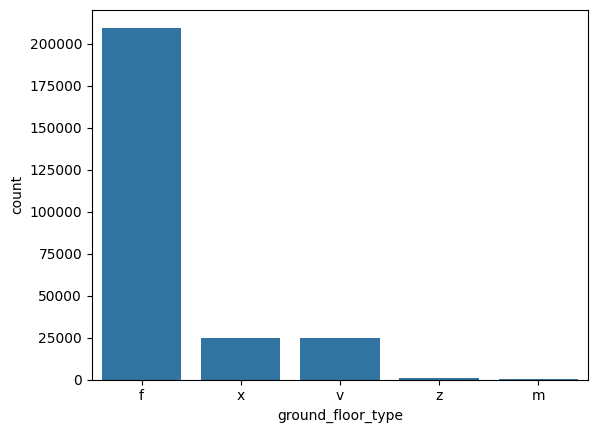

In [19]:
# plot didtriburion
sns.barplot(data=train_data.ground_floor_type.value_counts())

In [20]:
# Other floors type
train_data.other_floor_type.value_counts()

other_floor_type
q    165282
x     43448
j     39843
s     12028
Name: count, dtype: int64

<Axes: xlabel='other_floor_type', ylabel='count'>

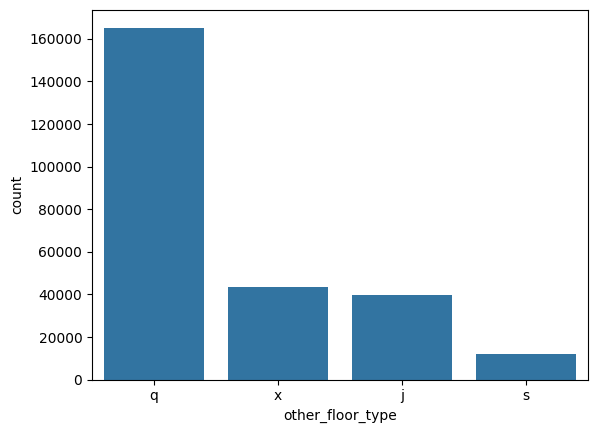

In [21]:
sns.barplot(data=train_data.other_floor_type.value_counts())

In [22]:
train_data.position.value_counts()

position
s    202090
t     42896
j     13282
o      2333
Name: count, dtype: int64

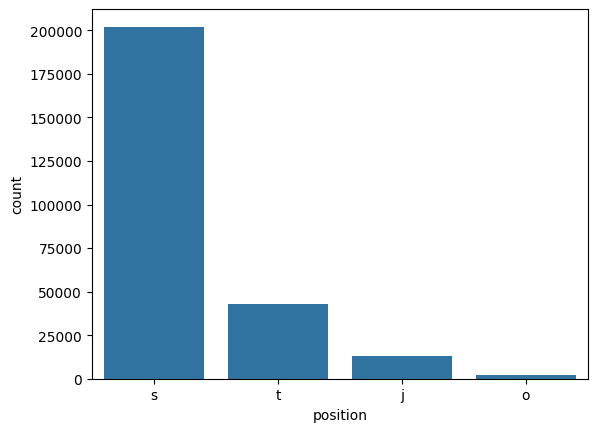

In [23]:
sns.barplot(data=train_data.position.value_counts());

### Ways Categorical variables relates with our target variable `damage_grade`

In [24]:
### Numerical variable

<Axes: xlabel='damage_grade', ylabel='age'>

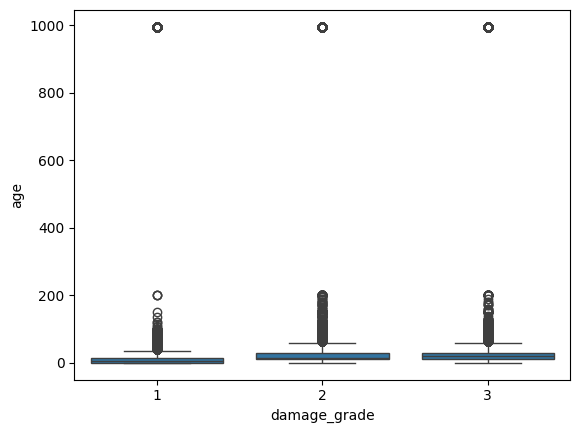

In [25]:
sns.boxplot(x='damage_grade', y='age', data=df)

In [26]:
# Insight from the above distribution

<Axes: xlabel='damage_grade', ylabel='age'>

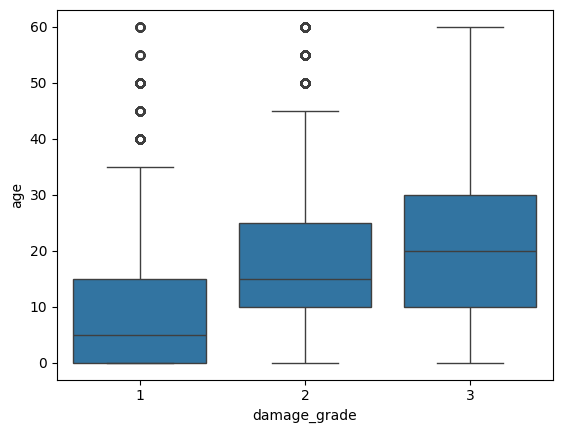

In [27]:
q5, q95 = df['age'].quantile([.05,.95])
mask = df['age'].between(q5,q95)
sns.boxplot(x='damage_grade', y='age', data=df[mask])

<Axes: xlabel='age', ylabel='Count'>

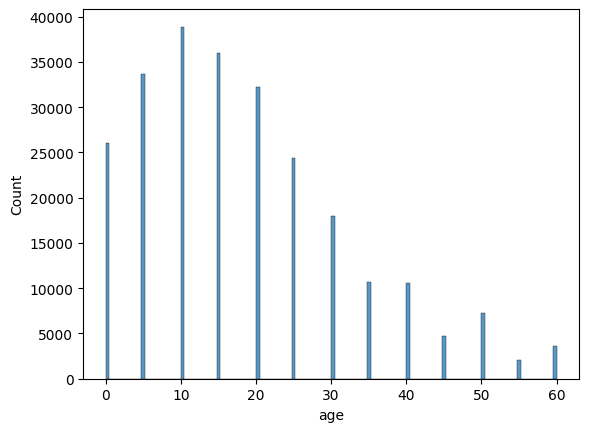

In [28]:
sns.histplot(x='age', data=df[mask])

In [29]:
# Height of building
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

<Axes: xlabel='count_floors_pre_eq', ylabel='Count'>

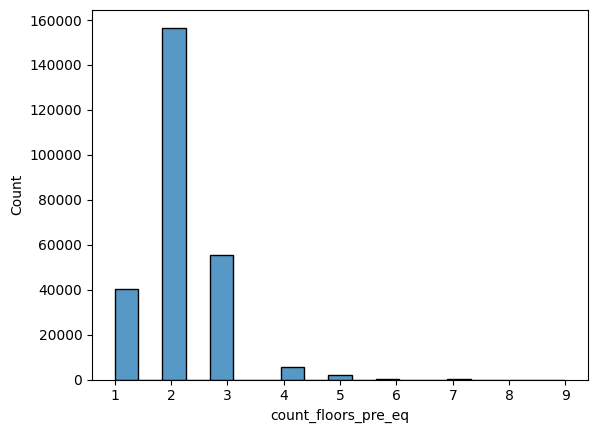

In [30]:
columns = ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']
sns.histplot(x='count_floors_pre_eq', data=df)

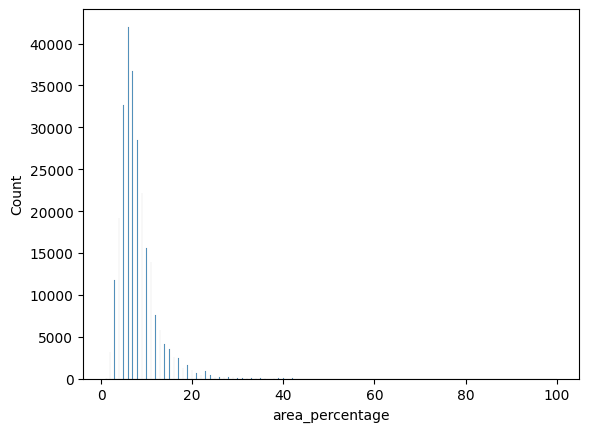

In [31]:
sns.histplot(x='area_percentage', data=df);

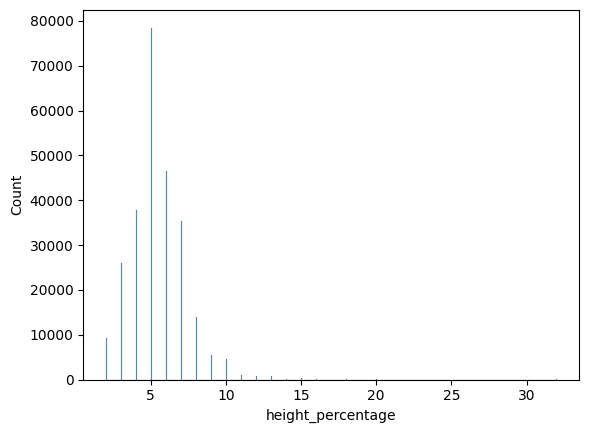

In [32]:
sns.histplot(x='height_percentage', data=df);

<Axes: >

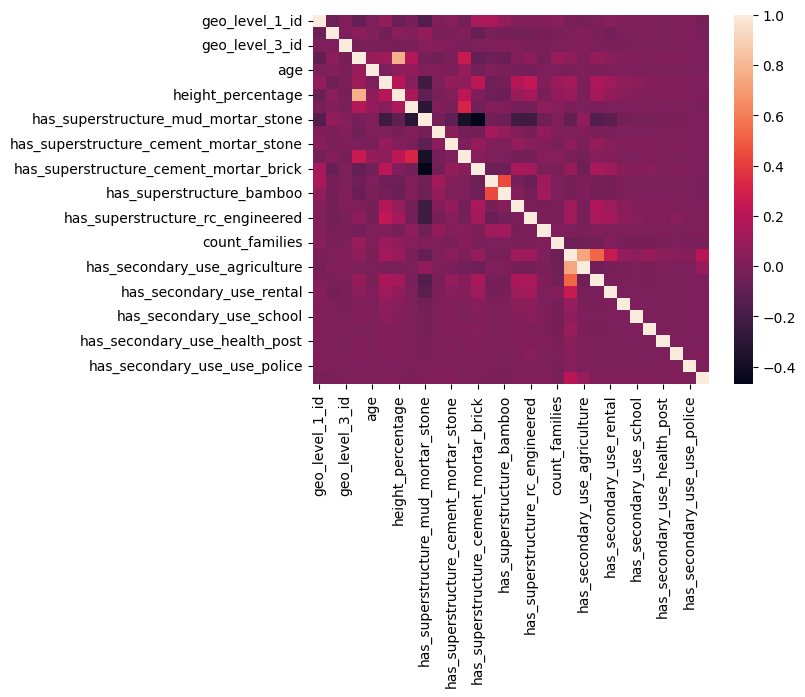

In [33]:
#Multi collinearity
corr_matrix = train_data.select_dtypes('number').corr()
sns.heatmap(corr_matrix)

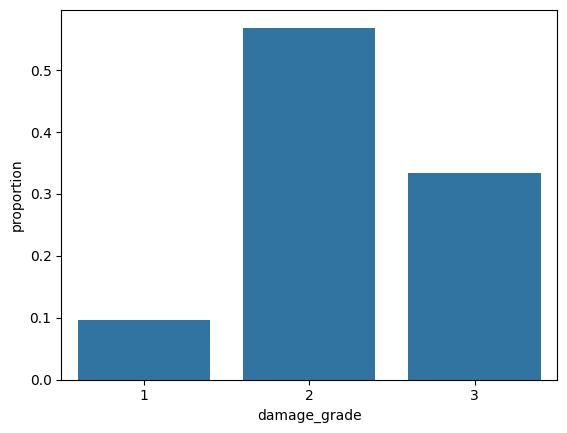

In [34]:
# Class Balance
sns.barplot(df['damage_grade'].value_counts(normalize=True));

### Attention
* The Data contains both numerical and categorical fields, one thing we have discovered in the EDA section is that most of the numerical fields are skewed
    and also contaions ourliers, but wait! we can go on with model building this way.
Alright no panic there is a solution

* 1. using `get_dummies()` method in pandas to code the categorical varibles.
  2. `StandardScalar` from scikit learn normalize the scale of numerical fields.

In [35]:
foundation_pivot = pd.pivot_table(
    df, index='land_surface_condition', values="damage_grade", aggfunc = np.mean
)

foundation_pivot

/tmp/ipykernel_5206/852386039.py:1: FutureWarning: The provided callable <function mean at 0x750c33d7de10> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  foundation_pivot = pd.pivot_table(


,damage_grade
land_surface_condition,
n,2.251407
o,2.289081
t,2.234170


In [36]:
# Dummy variable and feature selection
features = ['age','area_percentage','height_percentage','count_floors_pre_eq',
            'land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type',
            'other_floor_type', 'position','plan_configuration']

training_subset = train_data[features]
training_subset.head()

,age,area_percentage,height_percentage,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration
building_id,,,,,,,,,,,
802906,30,6,5,2,t,r,n,f,q,t,d
28830,10,8,7,2,o,r,n,x,q,s,d
94947,10,5,5,2,t,r,n,f,x,t,d
590882,10,6,5,2,t,r,n,f,x,s,d
201944,30,8,9,3,t,r,n,f,x,s,d


### Onehot Encoding using pandas `get_dummy` variables
    This is to encode the categorical variable in the subset data, so it can fit in for model building.

In [37]:
training_subset = pd.get_dummies(training_subset)
training_subset.head()

,age,area_percentage,height_percentage,count_floors_pre_eq,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,...,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u
building_id,,,,,,,,,,,,,,,,,,,,,
802906,30,6,5,2,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
28830,10,8,7,2,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
94947,10,5,5,2,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
590882,10,6,5,2,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
201944,30,8,9,3,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False


*We now have trues and falses in the categorical columns sames as 0 and 1*

In [38]:
# X matrix and y vector
X_train = training_subset
y_train = train_label.squeeze()

### Decision Tree Classiffier model

In [39]:
# Lets create a validation set from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [40]:
X_train.shape

(208480, 38)

In [41]:
tree_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=5, random_state=42)
)

tree_model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [42]:
training_acc = accuracy_score(y_train,tree_model.predict(X_train)) 
validation_acc = tree_model.score(X_val,y_val)
print(f"Training Accuracy: {round(training_acc,2)}")
print(f"Validation Accuracy: {round(validation_acc,2)}")

Training Accuracy: 0.58
Validation Accuracy: 0.58


In [43]:
tree_depth = tree_model.named_steps['decisiontreeclassifier'].get_depth()
print('Tree depth: ', tree_depth)

Tree depth:  5


In [44]:
depth_param = range(1,50,2)

In [45]:
training_accuracy =[]
validation_accuracy = []

for d in depth_param:
    #Build decision tree model
    model = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=d, random_state=42))
    #fit the model
    model.fit(X_train,y_train)
    #Append acc scores to the lists
    training_accuracy.append(model.score(X_train,y_train))
    validation_accuracy.append(model.score(X_val,y_val))


print(training_accuracy[:10])
print(validation_accuracy[:10])

[0.5697045280122793, 0.57582981580967, 0.5821133921719109, 0.5891116653875672, 0.5951985801995395, 0.6026381427475057, 0.6123081350729087, 0.6251247122026093, 0.6419320798158097, 0.6605525709900231]
[0.5657412559237159, 0.574240709119165, 0.5813587613437962, 0.5855221503808445, 0.5886111164405902, 0.5878820437059918, 0.584121563285432, 0.5810709694748758, 0.5789221235202702, 0.5745860593618695]


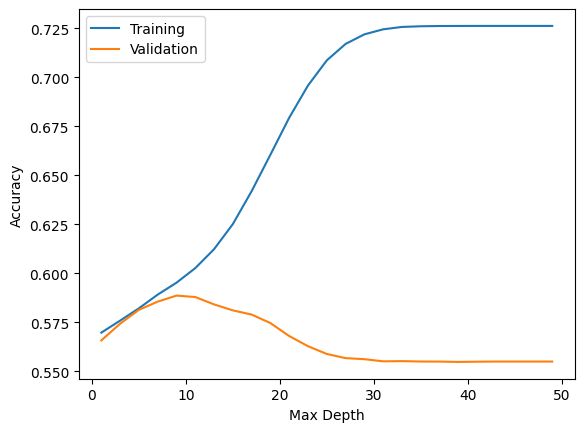

In [46]:
plt.plot(depth_param, training_accuracy, label="Training")
plt.plot(depth_param, validation_accuracy, label="Validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend();

In [47]:
# Evaluate on test set
test_subset = test_data[features]
test_subset = pd.get_dummies(test_subset)
test_subset.head()

,age,area_percentage,height_percentage,count_floors_pre_eq,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,...,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u
0,20,7,6,3,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,25,13,5,2,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
2,5,4,5,2,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,0,19,3,1,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,15,8,7,3,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [48]:
# evaluate

tree_preds = tree_model.predict(training_subset)
f1_score(train_label, tree_preds, average='micro')

np.float64(0.5819624636897018)

In [49]:
#Communicate
features = training_subset.columns
importances = tree_model.named_steps['decisiontreeclassifier'].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['age', 'area_percentage', 'height_percentage'], dtype='object')
Importances: [0.04726036 0.00966509 0.00293647]


In [50]:
ft_imp = pd.Series(importances, index=features).sort_values()
ft_imp.tail()

age                    0.047260
ground_floor_type_v    0.071436
count_floors_pre_eq    0.099437
other_floor_type_q     0.123292
foundation_type_r      0.533996
dtype: float64

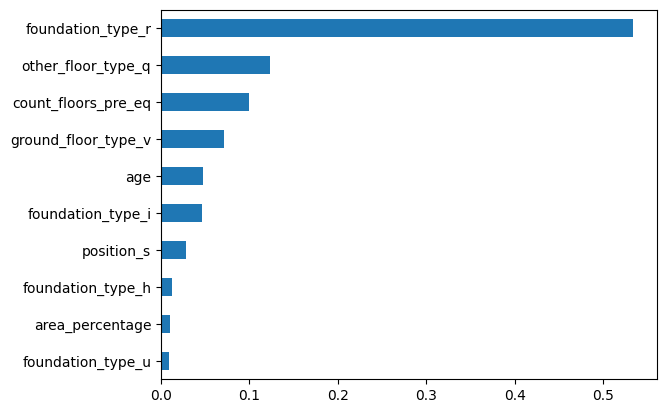

In [51]:
ft_imp.tail(10).plot(kind='barh');

### Random Forest Classifier

### Split Data

In [52]:
X = training_subset
y = train_label.values.ravel()

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [54]:
print("X_train:",X_train.shape)
print("X_val:",X_val.shape)
print("y_train:",y_train.shape)
print("y_val:",y_val.shape)

X_train: (182420, 38)
X_val: (78181, 38)
y_train: (182420,)
y_val: (78181,)


In [55]:
forest_model = make_pipeline(
    StandardScaler(), RandomForestClassifier(random_state=42)
)
forest_model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [56]:
train_acc = accuracy_score(y_train, forest_model.predict(X_train))
val_acc = forest_model.score(X_val,y_val)

print("Training Accuracy is:", round(train_acc,2))
print("Validation Accuracy is:", round(val_acc,2))

Training Accuracy is: 0.73
Validation Accuracy is: 0.57


In [57]:
forest_model.named_steps['randomforestclassifier'].n_estimators

100

In [77]:
f_score = f1_score(train_label, forest_model.predict(training_subset), average='micro')
f_score

np.float64(0.6817395174999329)

### Hyper-parameter tunning

In [59]:
params = {'randomforestclassifier__n_estimators': range(25,100,25), 
          'randomforestclassifier__max_depth': range(10,50,10)}
params

{'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [61]:
cv_model = GridSearchCV(
    forest_model,
    param_grid = params,
    cv=5
)
cv_model.fit(X_train,y_train)

/home/codespace/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)})

In [62]:
train_acc = accuracy_score(y_train, cv_model.predict(X_train))
val_acc = cv_model.score(X_val,y_val)

print("Training Accuracy is:", round(train_acc,2))
print("Validation Accuracy is:", round(val_acc,2))

Training Accuracy is: 0.68
Validation Accuracy is: 0.59
